In [33]:
import requests
from io import BytesIO
from PIL import Image
from scipy.ndimage import gaussian_filter
import random, logging
import numpy as np
import matplotlib.pyplot as plt

In [52]:
class GaussianBlur(object):

    def __init__(self, rate, sigma):
        self.rate = rate
        self.sigma = sigma

    def __call__(self, image):
        
        if random.random() < self.rate:
            image = self.gaussian_blur(image, self.sigma)
            
        # Clip the values to the valid range of [0, 255]
        image = np.clip(image, 0, 255)
            
        return image

    def gaussian_blur(self, image, sigma):
        """
        Applies a Gaussian blur to an image.
        """
        # Convert the image to a numpy array
        image = np.array(image)

        # Apply the Gaussian blur using scipy.ndimage
        image = gaussian_filter(image, sigma=sigma)

        return image

In [53]:
class GaussianNoise(object):

    def __init__(self, rate, noise):
        logging.info(
            f"Loaded GaussianNoise transformation")
        self.rate = rate
        self.noise = noise

    def __call__(self, image):
        
        # Convert the image to a numpy array
        image = np.array(image, dtype = float)
        
        if random.random() < self.rate:
            noise = np.random.normal(0, self.noise, image.shape)
            image += noise
            
        # Clip the values to the valid range of [0, 255]
        image = np.clip(image, 0, 255)
            
        return image

In [61]:
class AdjustBrightness(object):

    def __init__(self, rate, brightness):
        self.rate = rate
        self.brightness = brightness

    def __call__(self, image):
        if random.random() < self.rate:
            image = self.adjust_brightness(image, self.brightness)
        return image

    def adjust_brightness(self, image, brightness_factor):
        """
        Adjusts the brightness of an image by scaling each pixel value by the brightness_factor.
        """
        # Convert the image to a numpy array
        image = np.array(image)

        # Scale the image by the brightness factor
        image = image * brightness_factor

        # Clip the values to the valid range of [0, 255]
        image = np.clip(image, 0, 255)

        return image

In [80]:
class RandVerticalFlip(object):

    def __init__(self, rate):
        logging.info(
            f"Loaded RandomVerticalFlip transformation with probability {rate}")
        self.rate = rate

    def __call__(self, image):
        if random.random() < self.rate:
            image = np.flip(image, axis=1)
        return image


class RandHorizontalFlip(object):

    def __init__(self, rate):
        logging.info(
            f"Loaded RandomHorizontalFlip transformation with probability {rate}")
        self.rate = rate

    def __call__(self, image):
        if random.random() < self.rate:
            image = np.flip(image, axis=0)
        return image

In [82]:
# Download the image
response = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg")
img = Image.open(BytesIO(response.content))

# Apply the GaussianBlur transformation to the image
blurred_img = GaussianBlur(rate=1, sigma=5)(img)

# Apply the GaussianNoise transformation to the image
noise_img = GaussianNoise(rate = 1, noise = 150)(img)

# Apply the Brightness adjustment transformation to the image
bright_img = AdjustBrightness(rate = 1, brightness = 2.6)(img)

# Apply the H-flip transformation to the image
hflip_img = RandHorizontalFlip(rate = 1)(img)

# Apply the V-flip transformation to the image
vflip_img = RandVerticalFlip(rate = 1)(img)

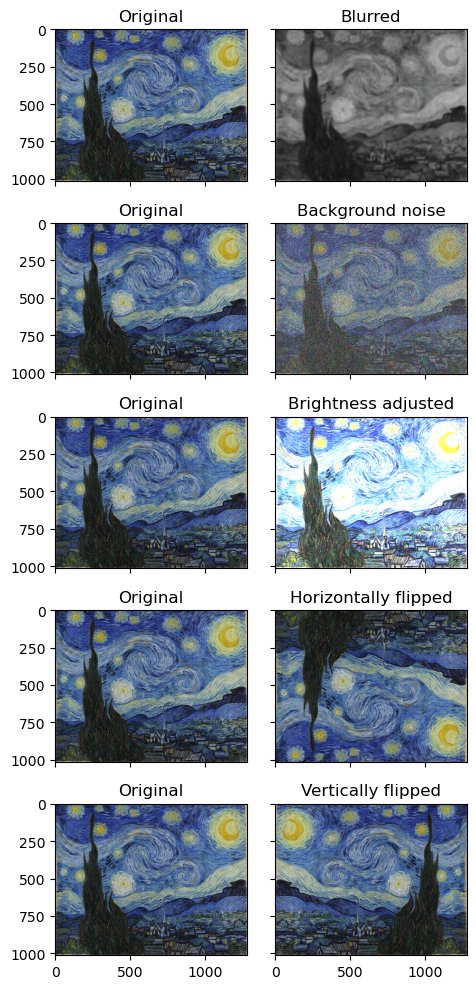

In [97]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(5, 10), sharex = "col", sharey = "row")
#plt.subplots_adjust(wspace=-1.1)

# Plot the original image on the first subplot
axs[0][0].imshow(img)
axs[0][0].set_title('Original')

# Plot the blurred image on the second subplot
axs[0][1].imshow(blurred_img)
axs[0][1].set_title('Blurred')

# Gaussian Noise
axs[1][0].imshow(img)
axs[1][0].set_title('Original')

axs[1][1].imshow(noise_img.astype('uint8'))
axs[1][1].set_title('Background noise')

# Brightness
axs[2][0].imshow(img)
axs[2][0].set_title('Original')

axs[2][1].imshow(bright_img.astype('uint8'))
axs[2][1].set_title('Brightness adjusted')

# H-flip
axs[3][0].imshow(img)
axs[3][0].set_title('Original')

axs[3][1].imshow(hflip_img.astype('uint8'))
axs[3][1].set_title('Horizontally flipped')

# V-flip
axs[4][0].imshow(img)
axs[4][0].set_title('Original')

axs[4][1].imshow(vflip_img.astype('uint8'))
axs[4][1].set_title('Vertically flipped')


# Show the figure
plt.tight_layout()
plt.show()